In [188]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [189]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [190]:
coef

array([62.6735955, 68.0472182])

In [191]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [192]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_history = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        err_history.append(err)

#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W, err_history

In [193]:
gd_W, gd_err_history = eval_model(data.T, target, iterations=3000, alpha=0.01)
gd_W

array([62.32796238, 68.27977939])

In [194]:
gd_err_history[-1]

26.425904860870617

In [196]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_history = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    for i in range(1, iterations+1):
        # эпоха обучения
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        err_history.append(err)
#     if i % (iterations / 10) == 0:
#         print(i, W, err)
    return W, err_history

In [197]:
sgd_W, sgd_err_history = eval_sgd_model(data.T, target, iterations=5000, qty_in_batch=1, alpha=0.01)

In [199]:
sgd_W

array([62.32724417, 68.27910708])

In [200]:
sgd_err_history[-1]

28.837393614596873

In [201]:
import seaborn as sns
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'MSE')

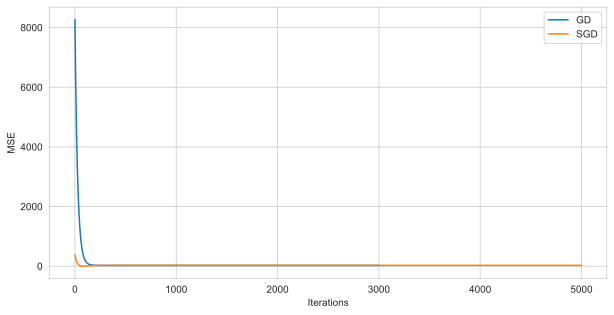

In [203]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(3000), y=gd_err_history)
sns.lineplot(x = range(5000), y=sgd_err_history)
plt.legend(labels=['GD', 'SGD'])
plt.xlabel("Iterations")
plt.ylabel("MSE")

In [208]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_history = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
        err_history.append(err)
#     if i % (iterations / 10) == 0:
#         print(i, W, err)
    return W, err_history

In [212]:
reg2_W, reg2_err_history = eval_model_reg2(data.T, target, iterations=3000, alpha=0.001, lambda_=1e-8)
reg2_W

array([62.1228881 , 68.06423381])

In [213]:
reg2_err_history[-1]

26.510766350990416

Text(0, 0.5, 'MSE')

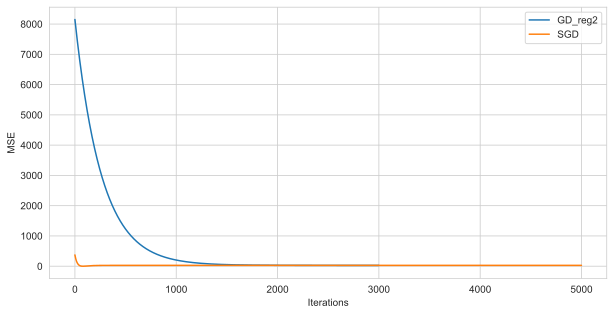

In [214]:
plt.figure(figsize=(10,5))
sns.lineplot(x = range(3000), y=reg2_err_history)
sns.lineplot(x = range(5000), y=sgd_err_history)
plt.legend(labels=['GD_reg2', 'SGD'])
plt.xlabel("Iterations")
plt.ylabel("MSE")

Ничего не изменилось особо, но если выкрутить шаг то получится вот что